주어진 시장/업종에서 상위 n개 종목의 평균 수익률/변동성
각 시장별 전체 n개월 평균 수익률/변동성 (상위 n개 종목 필터링)
시장별 n개월 평균 수익률/변동성 비교 시각화 (상위 n개 종목 필터링)

In [2]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [3]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import FinanceDataReader as fdr

In [5]:
import koreanize_matplotlib

In [6]:
from data_loader import load_sector_data

In [7]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', None) #None으로 설정하면 모든 행 출력

In [8]:
# 각 시장별 업종 리스트
def print_sector_lists(market):
  
  if market in ['KOSPI', 'KOSDAQ', 'ETF'] : 
    sector_list = load_sector_data(market=market)['Sector'].unique()
  else : 
    raise ValueError('KOSPI, KOSDAQ, ETF 중 하나의 시장을 입력해야 합니다.')
  
  print(f'{market} 시장의 업종 리스트 : {sector_list}')
    

In [10]:
print_sector_lists('KOSPI')

1개월 간의 data를 불러옵니다.
KOSPI 시장의 업종 리스트 : ['반도체와반도체장비' '전기제품' '제약' '자동차' '은행' '양방향미디어와서비스' '조선' '자동차부품' '철강' '복합기업'
 '증권' '비철금속' '생명보험' '석유와가스' '화학' '손해보험' '우주항공과국방' '해운사' '게임엔터테인먼트' '전기장비'
 '전자제품' '담배' '전기유틸리티' '무선통신서비스' '기계' '다각화된통신서비스' '항공화물운송과물류' 'IT서비스'
 '전자장비와기기' '항공사' '방송과엔터테인먼트' '무역회사와판매업체' '화장품' '식품' '운송인프라' '가정용기기와용품'
 '디스플레이패널' '카드' '호텔,레스토랑,레저' '건설' '가스유틸리티' '에너지장비및서비스' '섬유,의류,신발,호화품'
 '상업서비스와공급품' '건축자재' '광고' '소프트웨어' '백화점과일반상점' '음료' '건강관리장비와용품' '부동산' '포장재'
 '가구' '도로와철도운송' '디스플레이장비및부품' '핸드셋' '인터넷과카탈로그소매' '종이와목재' '복합유틸리티' '기타'
 '사무용전자제품' '창업투자' '통신장비' '생물공학' '판매업체' '교육서비스' '전문소매' '출판' '건축제품'
 '컴퓨터와주변기기' '가정용품' '레저용장비와제품' '식품과기본식료품소매' '문구류']


In [8]:
def visualize_top_n_stocks_performance(market=None, sector=None, info=None, cnt=10) :
  
  """
  주어진 시장/업종에서 상위 n개 종목의 수익률 혹은 변동성을 시각화하는 함수.

  Parameters:
  market (str): 시각화할 시장 ('KOSPI', 'KOSDAQ', 'ETF').
  sector (str): 필터링할 업종.
  info (str): 상위 종목을 정렬할 기준 (예: 'Volatility' 또는 'TotalReturn', 혹은 한글로 '변동성', '수익률').
  cnt (int): 시각화할 상위 종목의 개수 (기본값: 10).
  """
  
  # 한글로 입력한 경우에도 처리할 수 있도록 함
  
  if info == '변동성':
    info = 'Volatility'
  elif info == '수익률':
    info = 'TotalReturn'
  
  df = load_sector_data(market)
  
  avg_info = df[info].mean()
  
  print(f'{market}의 평균 {info} : {avg_info:.3f} %')  
  if sector is not None :
    if sector not in df['Sector'].unique():
      raise ValueError(f"'{sector}'는(은) 유효한 섹터가 아닙니다. 사용 가능한 섹터: {df['Sector'].unique()}")
    df = df[df['Sector'] == sector]
    avg_info = df[info].mean()
    

  # 4분위수 기준 (risk 매개변수)
  # if risk == 1:
  # 4분위수값 계산 
    quantile = df['Volatility'].quantile([0.25, 0.5, 0.75])
    quantile.index
    df['Volatility'] < df[df['Volatility'] == quantile[0.25]]
  
  
  # 상위 cnt개를 필터링
  df = df.sort_values(by=info, ascending=True).head(cnt)
    
  # 시장별 그래프 색상 설정
  market_colors = {
    'KOSPI': 'skyblue',
    'KOSDAQ': 'red',
    'ETF': 'lightgreen'
  }  
  
  color = market_colors.get(market, 'gray')   # 만일을 대비해 기본색상 지정
  
  if info == 'Volatility':
    xlabel = '변동성 (%)'
  elif info == 'TotalReturn':
    xlabel = '수익률 (%)'    
      
  plt.figure(figsize=(10, 6))
  plt.barh(df['Name'], df[info], color=color)
  
  if sector is not None :
    plt.title(f'{market} {sector}업종 종목 1개월 {info} 상위 {cnt}개')
  else :  
    plt.title(f'{market} 종목 1개월 {info} 상위 {cnt}개')
  
  
  plt.xlabel(xlabel)
  plt.ylabel('종목명')
  plt.grid(axis='x')
  plt.show()
  
  if sector is not None : 
    print(f'{market}의 {sector} 업종 평균 {info} : {avg_info:.3f} %')
    
  

In [27]:
def visualize_top_n_stocks_performance(market=None, sector=None, info='TotalReturn', month_ago=1, risk=2, cnt=10):
    """
    주어진 시장/업종에서 상위 n개 종목의 수익률 혹은 변동성을 시각화하는 함수.

    Parameters:
    market (str): 시각화할 시장 ('KOSPI', 'KOSDAQ', 'ETF').
    sector (str): 필터링할 업종.
    info (str): 상위 종목을 정렬할 기준 (예: 'Volatility' 또는 'TotalReturn', 혹은 한글로 '변동성', '수익률').
    cnt (int): 시각화할 상위 종목의 개수 (기본값: 10).
    """
    
    # 한글로 입력한 경우에도 처리할 수 있도록 함
    info_mapping = {
        '변동성': 'Volatility',
        '수익률': 'TotalReturn'
    }
    
    if info in info_mapping:
        info = info_mapping[info]  # 한글 입력 처리
    elif info not in info_mapping.values():  
        raise ValueError("유효하지 않은 정보입니다. '변동성','수익률','Volatility', 'TotalReturn'  중 하나를 선택하세요.")
    
    df = load_sector_data(market, month_ago=month_ago)
    avg_info = df[info].mean()
    print(f'{market}의 평균 {info} : {avg_info:.3f} %')  # 소수점 3자리 표시
    
    if sector is not None:
        if sector not in df['Sector'].unique():
            raise ValueError(f"'{sector}'는(은) 유효한 섹터가 아닙니다. 사용 가능한 섹터: {df['Sector'].unique()}")
        df = df[df['Sector'] == sector]
        avg_info_sector = df[info].mean()
        print(f'{market}의 {sector} 업종 평균 {info} : {avg_info_sector:.3f} %')  # 소수점 3자리 표시
    else:
        avg_info_sector = None  # 업종 평균이 없을 경우 None으로 설정
    
    
    df = df[df['Risk'] <= risk].sort_values(by=info, ascending=True).tail(cnt)
    
    
    # x라벨 설정
    if info == 'Volatility':
        xlabel = '변동성 (%)'
    elif info == 'TotalReturn':
        xlabel = '수익률 (%)'
        
    
    # Figure의 세로 사이즈 조정 (cnt에 따라)
    figure_height = 400 + (cnt * 30)        
    
    # Plotly로 그래프 작성
    fig = px.bar(
        df,
        x=info,
        y='Name',
        color='Risk',  # 위험도를 색상으로 사용
        color_continuous_scale=px.colors.sequential.Reds,  # 색상 스케일 설정
        title=f'{market} {sector if sector else ""}업종 종목 {month_ago}개월 {info} 상위 {cnt}개',
        labels={info: xlabel}
    )
    
    # 평균 수직선 추가
    fig.add_shape(type='line', xref='x', yref='y',
                  x0=avg_info, y0=-0.5, x1=avg_info, y1=len(df)-0.5,
                  line=dict(color='blue', dash='dash'),
                  name=f'평균 {market} {info}')
    
    # 평균 라벨 추가
    fig.add_annotation(
        x=avg_info,
        y=len(df) - 0.5,
        text=f'평균 {market} {info}: {avg_info:.3f} %',
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=-40,
        font=dict(color='blue')
    )
    
    if avg_info_sector is not None:
        fig.add_shape(type='line', xref='x', yref='y',
                      x0=avg_info_sector, y0=-0.5, x1=avg_info_sector, y1=len(df)-0.5,
                      line=dict(color='orange', dash='dash'),
                      name=f'평균 {sector} {info}')
        
        # 업종 평균 라벨 추가
        fig.add_annotation(
            x=avg_info_sector,
            y=-0.5,
            text=f'평균 {sector} {info}: {avg_info_sector:.3f} %',
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=40,
            font=dict(color='orange')
        )
    
    # 레이아웃 조정
    fig.update_layout(
        xaxis_title=xlabel,
        yaxis_title='종목명',
        showlegend=True,
        height=figure_height  # 보려고 하는 종목 수에 따라 동적으로 높이 설정
    )
    
    display(df.sort_values(by='TotalReturn', ascending=False))
    fig.show()
    

In [31]:
visualize_top_n_stocks_performance(market='KOSPI', risk=3, month_ago=1, cnt=30)

1개월 간의 data를 불러옵니다.
KOSPI의 평균 TotalReturn : 5.311 %


,Code,Name,Volatility,TotalReturn,Sector,Volume,Amount,Marcap,Risk
755,45014K,코오롱모빌리티그룹우,15.20,123.49,자동차,201,1417050,17315646000,3
341,018500,동원금속,14.09,116.31,자동차부품,69311,157638480,106133697910,3
59,097230,HJ중공업,9.05,106.07,건설,116254,822397000,575425281710,3
635,077500,유니퀘스트,7.53,78.87,반도체와반도체장비,36002,274778320,164592777240,3
628,008600,윌비스,11.54,76.06,"섬유,의류,신발,호화품",752,567760,50763209445,3
540,035510,신세계 I&C,9.18,69.41,IT서비스,17982,258545860,219408919800,3
363,003160,디아이,5.14,63.19,반도체와반도체장비,14769,246799920,470063000000,3
613,002630,오리엔트바이오,16.45,61.45,생물공학,644215,1218295614,228272284625,3
229,001210,금호전기,4.03,58.36,디스플레이장비및부품,17659,17815866,56145922833,3
218,083420,그린케미칼,5.76,56.29,화학,10215,70521670,166320000000,3


In [14]:
visualize_top_n_stocks_performance(market='KOSDAQ', sector='창업투자', info='수익률', month_ago=3, cnt=10)

3개월 간의 data를 불러옵니다.
KOSDAQ의 평균 TotalReturn : -3.340 %
KOSDAQ의 창업투자 업종 평균 TotalReturn : -2.673 %


In [15]:
visualize_top_n_stocks_performance(market='ETF', sector='국내파생', info='수익률', month_ago=3, cnt=30)

3개월 간의 data를 불러옵니다.
ETF의 평균 TotalReturn : 0.249 %
ETF의 국내파생 업종 평균 TotalReturn : -2.642 %


In [16]:
visualize_top_n_stocks_performance(market='ETF', info='수익률', month_ago=3, cnt=10)

3개월 간의 data를 불러옵니다.
ETF의 평균 TotalReturn : 0.249 %


In [ ]:
# ETF 데이터 가져오기
etfs = fdr.StockListing('ETF/KR')

# 유효한 ETF 심볼 리스트
valid_etfs = etfs['Symbol'].tolist()

# 변동성을 저장할 리스트
volatility_list_etf = []

# 각 ETF의 데이터를 가져와 변동성 계산
for index, row in etfs.iterrows():
    ticker = row['Symbol']
    if ticker not in valid_etfs:
        print(f"{ticker}는 유효하지 않은 심볼입니다.")
        continue
    
    try:
        # 각 ETF의 데이터 가져오기 (3개월)
        data_etf = fdr.DataReader(ticker, start='2023-09-01')  # 원하는 시작일 설정
        data_etf['Returns'] = data_etf['Close'].pct_change()  # 수익률 계산
        
        # 변동성 계산 (표준편차)
        volatility_etf = data_etf['Returns'].std() * 100  # 백분율로 변환
        volatility_list_etf.append({'Symbol': ticker, 'Name': row['Name'], 'Volatility': volatility_etf})
    except Exception as e:
        print(f"{ticker} 데이터 오류: {e}")

# 변동성 DataFrame 생성
volatility_etf_df = pd.DataFrame(volatility_list_etf)

# 변동성 상위 10개 ETF 추출
top_volatility_etf = volatility_etf_df.nlargest(10, 'Volatility')

# ETF 변동성 시각화
plt.figure(figsize=(10, 6))
plt.barh(top_volatility_etf['Name'], top_volatility_etf['Volatility'], color='lightgreen')
plt.title('ETF 3개월 변동성 상위 10개')
plt.xlabel('변동성 (%)')
plt.ylabel('ETF 이름')
plt.grid(axis='x')
plt.show()

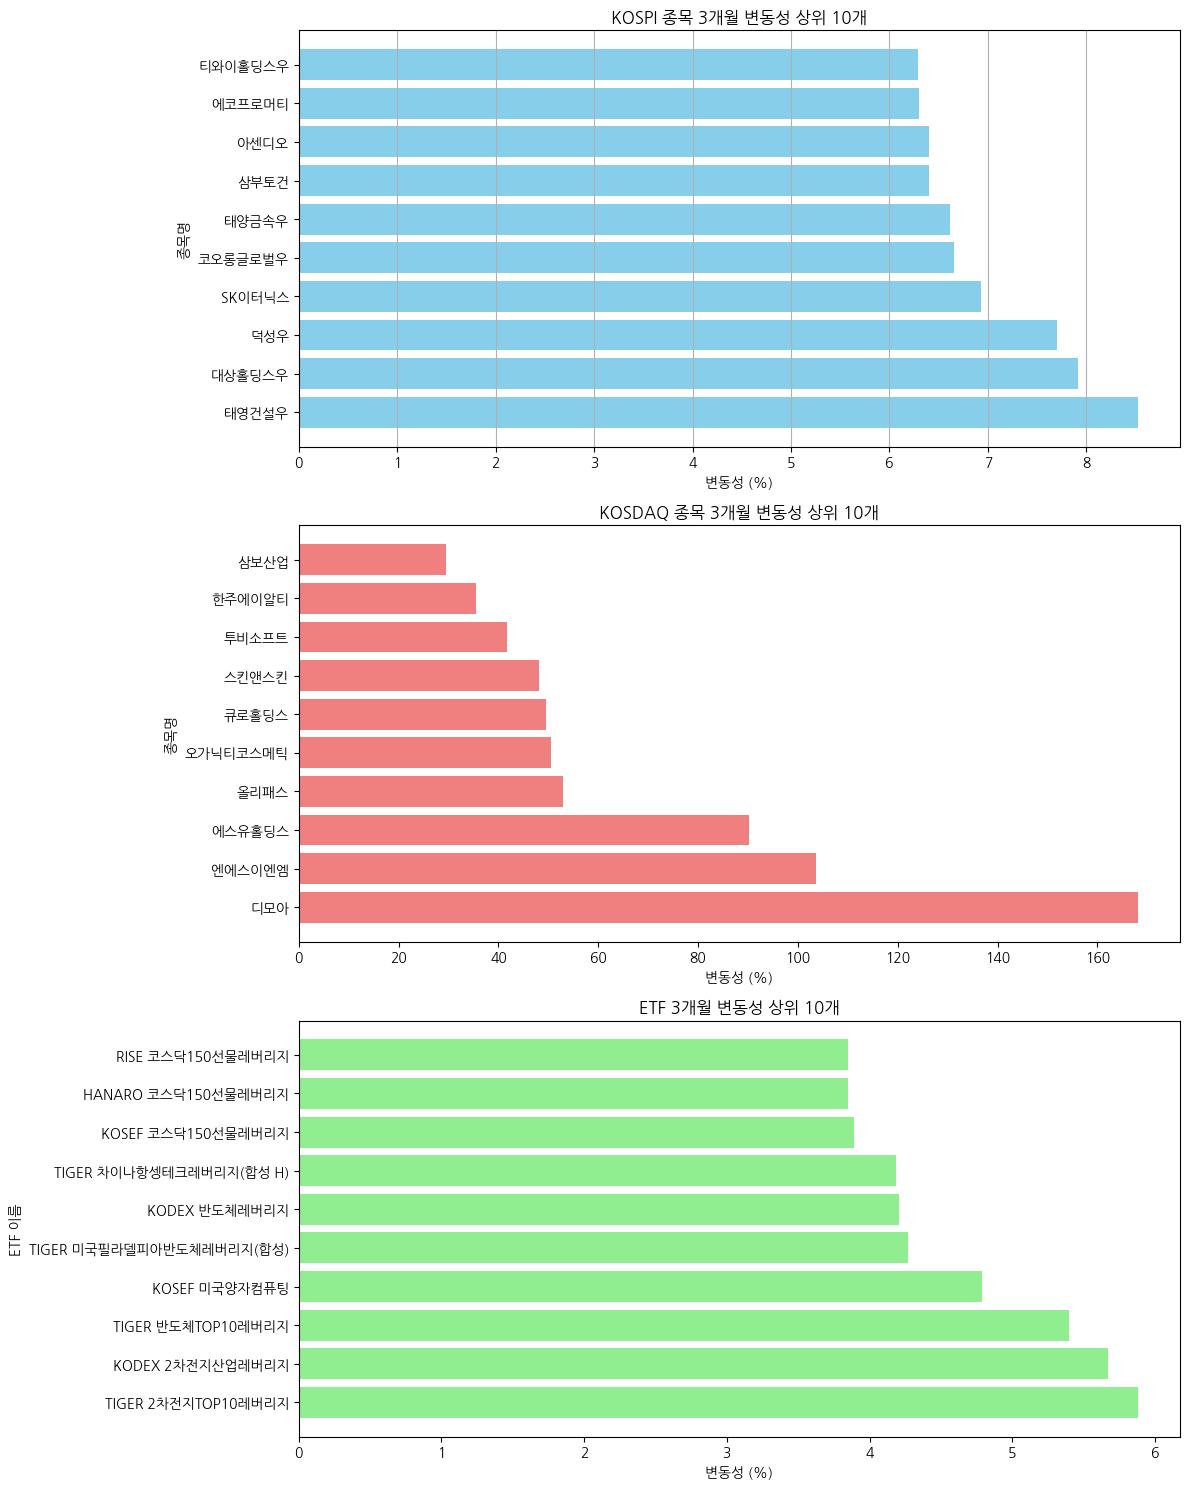

In [38]:
# KOSPI와 KOSDAQ, ETF변동성 시각화 비교
fig, axes = plt.subplots(3, 1, figsize=(12,15))

axes[0].barh(top_volatility['Name'], top_volatility['Volatility'], color='skyblue')
axes[0].set_title('KOSPI 종목 3개월 변동성 상위 10개')
axes[0].set_xlabel('변동성 (%)')
axes[0].set_ylabel('종목명')
axes[0].grid(axis='x')

axes[1].barh(top_volatility_kosdaq['Name'], top_volatility_kosdaq['Volatility'], color='lightcoral')
axes[1].set_title('KOSDAQ 종목 3개월 변동성 상위 10개')
axes[1].set_xlabel('변동성 (%)')
axes[1].set_ylabel('종목명')
axes[1].grid(axis='x')

axes[2].barh(top_volatility_etf['Name'], top_volatility_etf['Volatility'], color='lightgreen')
axes[2].set_title('ETF 3개월 변동성 상위 10개')
axes[2].set_xlabel('변동성 (%)')
axes[2].set_ylabel('ETF 이름')
axes[1].grid(axis='x')

plt.tight_layout()
plt.show()

In [17]:
# 전체 n개월 평균 변동성 계산
def avg_market_volatility(cnt=None, month_ago=3) :
    
    market_list = ['KOSPI','KOSDAQ','ETF']
    avg_dict = {}
    for market in market_list :
        df = load_sector_data(market=market, month_ago=month_ago)
        if cnt is not None:
            df = df.sort_values(by='Volatility', ascending=True).tail(cnt)
            
        avg_vol = df['Volatility'].mean()
        avg_dict[market] = avg_vol
    
    return avg_dict

In [18]:
# 시장별 평균 변동성 비교 시각화 (상위 n개 종목 필터링 가능)

def visualize_market_volatility(cnt=None, month_ago=3):
  
    avg_dict = avg_market_volatility(cnt, month_ago=month_ago)

    df = pd.DataFrame(list(avg_dict.items()), columns =['Market', 'Average Volatility'])
    
    if cnt is not None:
      title = f'각 시장의 변동성 상위 {cnt}종목 평균 변동성'
    else : 
      title = '각 시장의 평균 변동성' 

    # Plotly로 시각화
    fig = px.bar(
        df,
        x='Market',
        y='Average Volatility',
        title=title,
        labels={'Average Volatility': '평균 변동성 (%)'},
        color='Average Volatility',
        color_continuous_scale=px.colors.sequential.Viridis
    )
    
    # 레이아웃 조정
    fig.update_layout(
        xaxis_title='시장',
        yaxis_title='평균 변동성 (%)',
        height=400
    )
    
    fig.show()

In [27]:
# 전체 n개월 평균 수익률 계산
def avg_market_return(cnt=None, month_ago=3) :
    
    market_list = ['KOSPI','KOSDAQ','ETF']
    avg_dict = {}
    for market in market_list :
        df = load_sector_data(market=market, month_ago=month_ago)
        if cnt is not None:
            df = df.sort_values(by='TotalReturn', ascending=False).head(cnt)
            display(df)
        avg_vol = df['TotalReturn'].mean()
        avg_dict[market] = avg_vol
    
    return avg_dict

In [22]:
# 시장별 평균 수익률 비교 시각화 (상위 n개 종목 필터링 가능)

def visualize_market_return(cnt=None):
  
    avg_dict = avg_market_return(cnt)

    df = pd.DataFrame(list(avg_dict.items()), columns =['Market', 'Average Return'])
    
    if cnt is not None:
      title = f'각 시장의 상위 {cnt}종목 평균 수익률'
    else : 
      title = '각 시장의 평균 수익률' 

    # Plotly로 시각화
    fig = px.bar(
        df,
        x='Market',
        y='Average Return',
        title=title,
        labels={'Average Return': '평균 수익률 (%)'},
        color='Average Return',
    )
    
    # 레이아웃 조정
    fig.update_layout(
        xaxis_title='시장',
        yaxis_title='평균 수익률 (%)',
        height=400
    )
    
    fig.show()

In [28]:
visualize_market_return(10)

3개월 간의 data를 불러옵니다.


,Code,Name,Volatility,TotalReturn,AvgReturn,Sector,Volume,Amount,Marcap
462,002630,오리엔트바이오,10.94,290.22,2.844218,생물공학,66692558,123114880469,212856493975
680,015020,이스타코,9.80,241.81,2.513347,부동산,4808403,10428338985,92130940000
443,013360,일성건설,10.54,218.49,2.435820,건설,6889917,29740572035,226094122800
291,079900,전진건설로봇,6.69,124.14,1.646550,기계,798919,29423660300,540653792250
736,002410,범양건영,11.14,123.33,1.905378,건설,1119137,2885245045,70760536500
305,097230,HJ중공업,7.04,123.11,1.566717,건설,1022594,6048742530,490485515090
621,018500,동원금속,8.27,86.75,1.314449,자동차부품,28688630,73115427995,116653557835
903,45014K,코오롱모빌리티그룹우,8.95,83.27,1.358894,자동차,215775,1752255990,19108613600
316,100840,SNT에너지,5.53,77.60,1.073428,기계,449869,10090868450,459113382600
798,008600,윌비스,6.93,76.36,1.167479,"섬유,의류,신발,호화품",1374372,1050163610,52175166264


3개월 간의 data를 불러옵니다.


,Code,Name,Volatility,TotalReturn,AvgReturn,Sector,Volume,Amount,Marcap
1642,244460,올리패스,121.10,950.66,15.748468,제약,86399,411664220,19218678210
1378,009620,삼보산업,67.35,784.11,9.424505,비철금속,601041,1632708605,39401670600
1691,051780,큐로홀딩스,113.86,576.10,14.053609,식품,43921,48249990,14665413375
1585,900300,오가닉티코스메틱,115.98,496.34,14.086206,화장품,305478,148585466,23867719338
337,065500,오리엔트정공,11.55,429.55,3.369646,자동차부품,10947635,73742665260,207598644480
1659,030350,드래곤플라이,50.89,399.61,6.698214,게임엔터테인먼트,164611,215708950,17957865436
969,062970,한국첨단소재,10.04,357.49,3.012160,통신장비,4584623,31321369370,71151228890
1562,025440,DH오토웨어,42.14,267.39,5.210177,자동차부품,83553,69581059,26010134280
368,205500,액션스퀘어,7.48,239.81,2.228073,게임엔터테인먼트,2134641,7574239020,190576200400
129,025950,동신건설,10.85,164.39,2.170156,건설,2200429,120760860800,455280000000


3개월 간의 data를 불러옵니다.


,Code,Name,Volatility,TotalReturn,AvgReturn,Sector,Volume,Amount,Marcap
258,465610,ACE 미국빅테크TOP7 Plus레버리지(합성),2.75,53.26,0.711537,해외주식,75039,2324,963
51,457480,ACE 테슬라밸류체인액티브,4.05,48.65,0.720039,해외주식,3179253,56013,6918
571,461910,PLUS 미국테크TOP10레버리지(합성),2.68,47.21,0.649213,해외주식,4015,121,152
227,465350,RISE 2차전지TOP10인버스(합성),2.81,39.36,0.575539,국내파생,1182672,41982,1119
178,473460,KODEX 미국서학개미,2.17,38.52,0.554138,해외주식,999610,18900,1582
350,407830,에셋플러스 글로벌플랫폼액티브,1.59,37.17,0.533631,해외주식,14168,189,483
728,438210,PLUS 글로벌AI,1.71,33.05,0.485816,해외주식,1292,20,80
224,418660,TIGER 미국나스닥100레버리지(합성),2.38,32.70,0.475356,해외주식,142595,3778,1144
469,461340,HANARO 글로벌생성형AI액티브,1.76,32.15,0.464460,해외주식,24566,507,249
400,371450,TIGER 글로벌클라우드컴퓨팅INDXX,1.48,31.43,0.440607,해외주식,12252,156,367


{'KOSPI': 144.50799999999998,
 'KOSDAQ': 466.5450000000001,
 'ETF': 39.349999999999994}

In [118]:
visualize_market_volatility()

In [123]:
# 각 시장별 변동성 상위 10종목 평균 변동성 계산
visualize_market_volatility(10)

1. 평균 변동성

    KOSPI: 평균 변동성이 6.97%로 상대적으로 낮은 편입니다. 이는 KOSPI에 포함된 대형주들이 안정적인 성향을 가지고 있음을 나타냅니다.
    KOSDAQ: 평균 변동성이 66.95%로 매우 높습니다. 이는 KOSDAQ이 주로 중소형주와 기술주로 구성되어 있어 시장의 변동성이 크고 위험도가 상대적으로 높다는 것을 의미합니다.
    ETF: 평균 변동성이 4.60%로 KOSPI보다 낮고 KOSDAQ보다 높습니다. 이는 ETF가 다양한 자산에 투자할 수 있지만, 특정 섹터나 주식에 대한 노출로 인해 변동성이 발생할 수 있음을 나타냅니다.

2. 시가총액

    KOSPI: 총 시가총액이 약 1,997조 원으로, KOSPI가 한국 주식 시장에서 가장 큰 규모를 자랑합니다. 대형 기업들이 중심이 되는 만큼 안정성과 신뢰성을 높이는 요소가 됩니다.
    KOSDAQ: 총 시가총액이 약 341조 원으로 KOSPI에 비해 상대적으로 작은 규모입니다. 이는 KOSDAQ이 중소형주 위주로 구성되어 있어 시장의 전체 규모가 작음을 나타냅니다.
    ETF: 총 시가총액이 약 1,723억 원으로, KOSPI와 KOSDAQ에 비해 매우 낮습니다. 이는 ETF의 종류가 제한적이거나 특정 자산에 집중되어 있을 가능성을 시사합니다.

3. 결론

    KOSPI는 안정성과 규모 면에서 우수한 성과를 보이고 있으며, 대형주 위주로 안정적인 투자처로 평가됩니다.
    KOSDAQ은 높은 변동성으로 인해 위험도가 크지만, 성장 가능성이 높은 중소형주에 투자하는 경향이 있어 투자자에게 더 큰 수익을 추구할 수 있는 기회를 제공합니다.
    ETF는 상대적으로 낮은 변동성과 작은 시가총액을 가지고 있어, 다양한 자산에 분산 투자할 수 있는 장점이 있지만, 특정 시장이나 섹터에 대한 노출로 인해 변동성이 발생할 수 있습니다.

KOSPI

    상위 10종목의 평균 변동성(6.97%)이 모든 종목의 평균 변동성(2.60%)보다 훨씬 높습니다. 이는 KOSPI 내에서 높은 변동성을 보이는 종목들이 존재하지만, 전체적으로는 안정적인 대형주들이 대부분을 차지하여 평균 변동성이 낮은 것을 나타냅니다. 즉, 특정 종목에서의 높은 변동성이 전체 시장에 큰 영향을 미치지 않는 구조입니다.

KOSDAQ

    상위 10종목의 평균 변동성(66.95%)이 모든 종목의 평균 변동성(3.75%)보다 매우 높습니다. 이는 KOSDAQ이 중소형주와 기술주 위주로 구성되어 있어, 상위 종목들이 극심한 변동성을 보이는 경향이 있음을 나타냅니다. 전체적으로 KOSDAQ 시장이 변동성이 큰 특성을 가지며, 이는 투자자에게 높은 리스크를 동반하는 동시에 높은 수익 가능성도 제공할 수 있습니다.

ETF

    상위 10종목의 평균 변동성(4.60%)은 모든 종목의 평균 변동성(1.32%)보다 높지만, KOSPI와 KOSDAQ에 비해 상대적으로 안정적인 편입니다. ETF는 다양한 자산에 분산 투자할 수 있는 장점이 있어, 변동성을 낮출 수 있는 효과가 있습니다. 그러나 특정 섹터나 주식에 대한 노출로 인해 변동성이 발생할 수 있습니다.

3. 종합적인 결론

    KOSPI는 안정적인 대형주로 구성되어 있어, 위험을 감수하지 않고도 안정적인 성장을 추구할 수 있는 투자처입니다.
    KOSDAQ은 높은 변동성으로 인해 투자 리스크가 크지만, 성장 가능성이 큰 중소형주에 투자하는 기회를 제공합니다.
    ETF는 비교적 낮은 변동성을 가지고 있어, 안정적인 투자 방법으로 고려될 수 있으며, 다양한 자산에 대한 분산 투자로 포트폴리오의 위험을 줄이는 데 도움이 됩니다.

1. KOSPI

    평균 변동성: 2.60%
    상위 변동성: 6.97%
    시가총액: 약 1,997조 원

추천 투자자 성향

    안정성을 추구하는 투자자: KOSPI는 평균 변동성이 낮아 상대적으로 안정적인 투자처로 평가됩니다. 대형주 중심의 포트폴리오로 구성되어 있어, 안정적인 수익을 원하는 투자자에게 적합합니다.

    장기 투자자: KOSPI의 대형주들은 안정적인 성장을 보여주므로, 장기적으로 자산을 늘리고자 하는 투자자에게 유리합니다.

    위험 회피 성향: 평균 변동성이 낮고, 상위 변동성이 존재하더라도 전체적으로 안정적인 성과를 기대할 수 있어, 리스크를 최소화하려는 투자자에게 적합합니다.

    배당 수익을 중시하는 투자자: KOSPI에 상장된 많은 기업들이 안정적인 배당금을 지급하므로, 정기적인 배당 수익을 기대하는 투자자에게 유리합니다.

2. KOSDAQ

    평균 변동성: 3.75%
    상위 변동성: 66.95%
    시가총액: 약 341조 원

추천 투자자 성향

    성장 가능성을 추구하는 투자자: KOSDAQ은 중소형주와 기술주 중심으로 구성되어 있어, 높은 성장 잠재력을 가진 기업에 투자하고자 하는 투자자에게 적합합니다.

    높은 변동성을 감수할 수 있는 투자자: 평균 변동성은 낮지만, 상위 변동성이 매우 높습니다. 이는 특정 종목에서 큰 수익을 추구할 수 있지만, 반대로 큰 손실도 감수해야 함을 의미합니다. 따라서 높은 리스크를 감수할 수 있는 투자자에게 추천합니다.

    단기 투자자: KOSDAQ의 높은 변동성은 단기적인 가격 변동을 활용하여 수익을 추구하는 투자자에게 유리합니다.

3. ETF

    평균 변동성: 1.32%
    상위 변동성: 4.60%
    시가총액: 약 1,723억 원

추천 투자자 성향

    분산 투자 선호 투자자: ETF는 다양한 자산에 분산 투자할 수 있는 장점이 있어, 리스크를 최소화하고자 하는 투자자에게 적합합니다. 평균 변동성이 낮아 안정적인 성향을 보입니다.

    특정 테마나 섹터에 투자하고자 하는 투자자: ETF를 통해 특정 지수나 자산군에 집중 투자할 수 있으며, 이는 특정 테마에 대한 노출을 원하는 투자자에게 유리합니다.

    장기 및 단기 모두 고려하는 투자자: ETF는 유동성이 높아 장기 투자뿐만 아니라 단기적인 가격 변동을 활용할 수 있어, 다양한 투자 전략을 구사할 수 있습니다.

결론

    KOSPI는 안정성과 장기적인 성장을 추구하는 투자자에게 추천됩니다.
    KOSDAQ은 높은 성장 가능성과 변동성을 감수할 수 있는 투자자에게 적합합니다.
    ETF는 다양한 자산에 분산 투자하고자 하며, 안정성을 추구하는 투자자에게 유리합니다.